In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Table of content

- [EDA](#EDA)
    - [1.1 Data-preproceeing](#11Data-preproceeing)
    - [1.2 feature classification](#12featureclassification)
    - [1.4 sumarry](#14sumarry)

# EDA

**there are 60 variables don't have meanings, I just uploaded the excel sheet on Teams to request meanings of them from NHS**

In [3]:
dfdict=pd.read_excel('./data/dataDict.xlsx',index_col=0)

In [4]:
dfdict[dfdict['Mean'].isna()].shape

(60, 1)

<a id="11Data-preproceeing"></a>
## 1.1 Data-preproceeing

In [5]:
df1=pd.read_csv('./data/data1.csv',low_memory=False)

In [6]:
df1.shape

(41846, 101)

- **NaN columns:** two features that are entirely filled with null value are **discharge_delay_reason_national_code** and **social_worker_date_time_referred**, we can drop them directly
- **two variables with large missing values:** two features with small data points are **covid19_diagnosis_flag** and **covid19_diagnosis_description**, after futher explonation of **covid19_diagnosis_flag**, I found that all the data points is 1.0, so we can drop this variable since it doesn't provide any useful infomation. As for **covid19_diagnosis_description**, it's a categrical data set with 148 'Confirmed COVID-19' data points and 3 'Suspected COVID-19'data points
since COVID-19 ear is the past and data points relative to total smaple is so small, Should we drop the varible? does the variable contribute to model or will COVID-19 are a problems in the future for patients flow?

- **Missing values for 26 variables:**, after droping 4 variables ttalked above, we still have 97 variables, after checked the missing values,  there are 26 variables have missing values. 22 of them have very large missing values, while the other 4 variables just have few missing values(less than 150),which won't cause any influence to the model in my opinion

- **variable with only one data point：** afte checking the unqiue value for al variables, I found 'ae_unplanned_attendance' with only one value(1.0). we can drop the this varible since it doesn't provide any infomation
- summay: we finally reduce our variables from 101 to 96 variables, there are 5 variables are not contribute to future prediction, 44 variables are object type

In [7]:
s1=df1.iloc[:,:30]
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   site_national_code                    41846 non-null  object 
 1   site_description                      41846 non-null  object 
 2   site_local_code                       41846 non-null  object 
 3   Admission_Date                        41846 non-null  object 
 4   admission_date_dt                     41846 non-null  object 
 5   discharge_date_dt                     41846 non-null  object 
 6   specialty_local_code                  41846 non-null  object 
 7   specialty_spec_code                   41846 non-null  int64  
 8   specialty_spec_desc                   41846 non-null  object 
 9   ward_code_admission                   41846 non-null  object 
 10  ward_name_admission                   41846 non-null  object 
 11  ward_code_disch

In [8]:
s2=df1.iloc[:,30:60]
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delayed_discharges_no_of_days        41846 non-null  int64  
 1   readmission_flag_28_days             41846 non-null  int64  
 2   readmission_flag_30_days             41846 non-null  int64  
 3   social_worker_date_time_referred     0 non-null      float64
 4   discharge_letter_sent                24563 non-null  object 
 5   discharge_letter_sent_in_24hrs       24563 non-null  float64
 6   inpatient_death_flag                 41846 non-null  int64  
 7   spell_days_elective                  41846 non-null  int64  
 8   spell_days_non_elective              41846 non-null  int64  
 9   sex_national_code                    41846 non-null  int64  
 10  elective_admission_flag              41846 non-null  int64  
 11  non_elective_admission_flag 

In [9]:
s3=df1.iloc[:,60:]
s3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   comorbidity_acute_myocardial_infarction_flag   41846 non-null  int64  
 1   comorbidity_cancer_flag                        41846 non-null  int64  
 2   comorbidity_cerebral_vascular_accident_flag    41846 non-null  int64  
 3   comorbidity_dementia_flag                      41846 non-null  int64  
 4   comorbidity_congestive_heart_failure_flag      41846 non-null  int64  
 5   comorbidity_conncective_tissue_disorder_flag   41846 non-null  int64  
 6   comorbidity_diabetes_complications_flag        41846 non-null  int64  
 7   comorbidity_diabetes_flag                      41846 non-null  int64  
 8   comorbidity_hiv_flag                           41846 non-null  int64  
 9   comorbidity_liver_disease_flag                 418

In [11]:
df1['covid19_diagnosis_flag'].nunique()

1

In [12]:
df1[~df1['covid19_diagnosis_flag'].isna()]['covid19_diagnosis_flag']

387      1.0
1062     1.0
1323     1.0
1400     1.0
1701     1.0
        ... 
36802    1.0
37136    1.0
37194    1.0
37625    1.0
38076    1.0
Name: covid19_diagnosis_flag, Length: 151, dtype: float64

In [13]:
df1['covid19_diagnosis_description'].nunique()

2

In [14]:
df1['covid19_diagnosis_description'].value_counts()

covid19_diagnosis_description
Confirmed COVID-19    148
Suspected COVID-19      3
Name: count, dtype: int64

In [15]:
missvalue_columns=df1.loc[:,(df1.isna().sum()>0)].columns

In [16]:
df1[missvalue_columns].isna().sum()

ward_code_discharge                         1
ward_name_discharge                         1
date_of_death_dt                        40315
duration_elective_wait                  24551
discharge_delay_reason_national_code    41846
social_worker_date_time_referred        41846
discharge_letter_sent                   17283
discharge_letter_sent_in_24hrs          17283
general_medical_practice_desc             156
discharge_created_datetime_dt              15
discharge_letter_status                 17119
covid19_diagnosis_flag                  41695
covid19_diagnosis_description           41695
Arrival_Date                            30382
arrival_date_time                       30382
attendancetype                          30382
initial_assessment_date_time            30382
sex_description.y                       30382
arrival_mode_description                30382
place_of_incident                       30468
source_of_ref_description               30382
presenting_complaint              

**check variable withonly one data point**

In [17]:
df1.loc[:,df1.nunique()==1].columns

Index(['covid19_diagnosis_flag', 'ae_unplanned_attendance'], dtype='object')

In [18]:
df1.drop(['discharge_delay_reason_national_code','social_worker_date_time_referred',
          'covid19_diagnosis_flag','covid19_diagnosis_description','ae_unplanned_attendance'],axis=1,inplace=True)

In [19]:
df1.shape

(41846, 96)

<a id="12featureclassification"></a>
## 1.2 feature classification

**dentify categorical variables**
variables with number of unique values less than 10 might are likely to be categorical. There are 54 features are likely to be categorical variables
- there are 41 binary variables; I found there are 4 variables of 41 variables are string type, other 37 are 0 and 1. we don't need to handle the variables with 0 and 1, while, we need to conduct feature engineering for other 4 variables since most of model cannot handle string type variables.

- **ward_type_admission**, **ward_type_discharge**,**sex_description.y**,**inj_or_ail** these 4 variables distrubtion illustrate below.
  

In [20]:
binary_feature_name=df1.loc[:,df1.nunique()==2].columns

In [21]:
len(binary_feature_name)

41

In [22]:
binary_feature_name

Index(['delayed_discharges_flag', 'readmission_flag_28_days',
       'readmission_flag_30_days', 'discharge_letter_sent_in_24hrs',
       'inpatient_death_flag', 'elective_admission_flag',
       'non_elective_admission_flag', 'emergency_readmission_non_pbr_30',
       'readmission_flag_28_days_emergancy',
       'readmission_flag_30_days_emergancy', 'IP_admission', 'IP_discharge',
       'ward_type_admission', 'ward_type_discharge', 'medically_optimised',
       'dementia_diagnosis_flag',
       'comorbidity_acute_myocardial_infarction_flag',
       'comorbidity_cancer_flag',
       'comorbidity_cerebral_vascular_accident_flag',
       'comorbidity_dementia_flag',
       'comorbidity_congestive_heart_failure_flag',
       'comorbidity_conncective_tissue_disorder_flag',
       'comorbidity_diabetes_complications_flag', 'comorbidity_diabetes_flag',
       'comorbidity_hiv_flag', 'comorbidity_liver_disease_flag',
       'comorbidity_metastatic_cancer_flag', 'comorbidity_paraplegia_flag',

In [23]:
obj_cols = df1.select_dtypes(include='object').columns

In [24]:
len(obj_cols)

44

In [25]:
df1[binary_feature_name].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   delayed_discharges_flag                        41846 non-null  int64  
 1   readmission_flag_28_days                       41846 non-null  int64  
 2   readmission_flag_30_days                       41846 non-null  int64  
 3   discharge_letter_sent_in_24hrs                 24563 non-null  float64
 4   inpatient_death_flag                           41846 non-null  int64  
 5   elective_admission_flag                        41846 non-null  int64  
 6   non_elective_admission_flag                    41846 non-null  int64  
 7   emergency_readmission_non_pbr_30               41846 non-null  int64  
 8   readmission_flag_28_days_emergancy             41846 non-null  int64  
 9   readmission_flag_30_days_emergancy             418

In [26]:
df1['ward_type_admission'].value_counts()

ward_type_admission
Specialty     27231
Assessment    14615
Name: count, dtype: int64

In [27]:
df1['ward_type_discharge'].value_counts()

ward_type_discharge
Specialty     30697
Assessment    11149
Name: count, dtype: int64

In [28]:
df1['sex_description.y'].value_counts()

sex_description.y
Female    6040
Male      5424
Name: count, dtype: int64

In [29]:
df1['inj_or_ail'].value_counts()

inj_or_ail
Ailment    9194
Injury      828
Name: count, dtype: int64

In [32]:
df1['site_national_code'].value_counts()

site_national_code
RRF02    28833
RRF01     6616
RRF53     6350
RRF70       47
Name: count, dtype: int64

In [33]:
df1['site_description'].value_counts()

site_description
ROYAL ALBERT EDWARD INFIRMARY     28833
LEIGH INFIRMARY                    6616
WRIGHTINGTON HOSPITAL              6350
BOSTON HOUSE, WIGAN HEALTH CTR       47
Name: count, dtype: int64

In [34]:
df1['site_local_code'].value_counts()

site_local_code
RAEI    28833
LEI      6616
WNT      6350
BOHS       47
Name: count, dtype: int64

In [35]:
df1['discharge_delay_reason_description'].value_counts()

discharge_delay_reason_description
DW Generated           41844
OTHER                      1
EQUIPMENT - PATIENT        1
Name: count, dtype: int64

In [36]:
df1['specialty_division'].value_counts()

specialty_division
Medicine               21423
Surgery                13221
Specialist Services     7202
Name: count, dtype: int64

In [37]:
df1['specialty_directorate'].value_counts()

specialty_directorate
Medicine               21423
Surgery                 9000
Specialist Services     7202
Womens Health           4221
Name: count, dtype: int64

In [38]:
df1['delayed_discharges_no_of_days'].value_counts()

delayed_discharges_no_of_days
0     41844
14        1
3         1
Name: count, dtype: int64

In [39]:
df1['sex_national_code'].value_counts()

sex_national_code
2    22568
1    19275
9        3
Name: count, dtype: int64

In [40]:
df1['discharge_letter_status'].value_counts()

discharge_letter_status
Letter Sent                             24541
Awaiting Letter Send                      140
Awaiting Discharge Letter Completion       24
Awaiting Discharge Checklist               15
Awaiting Pharmacy Verification              4
Awaiting Medication Final Check             2
Awaiting Medication Collection              1
Name: count, dtype: int64

In [41]:
df1['attendancetype'].value_counts()

attendancetype
Majors          8889
GP Streaming    1201
Paeds            909
Resus            375
Minors            70
Other             20
Name: count, dtype: int64

In [42]:
df1['acuity_code'].value_counts()

acuity_code
3.0    6360
2.0    3567
4.0     976
1.0     112
5.0       2
Name: count, dtype: int64

In [43]:
df1['attend_dis_description'].value_counts()

attend_dis_description
Admitted      10437
Discharged      885
Ward            138
Transfer          4
Name: count, dtype: int64

In [44]:
df1['location'].value_counts()

location
Majors Awaiting Triage         5461
ECC Awaiting Triage            5089
Paediatrics Awaiting Triage     914
Name: count, dtype: int64

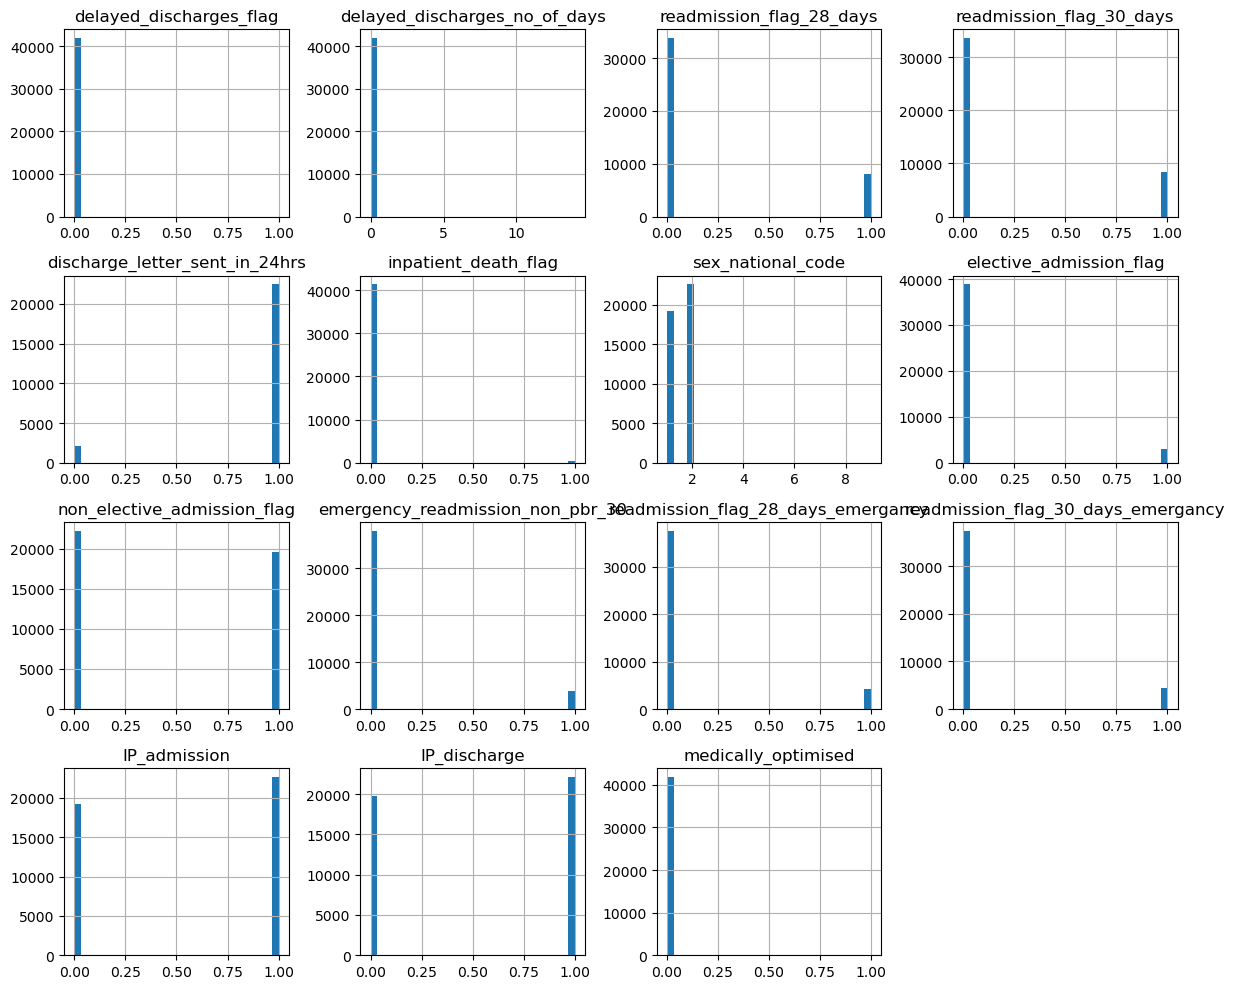

In [129]:
df1.loc[:,col1].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()